In [1]:
import numpy as np
import pandas as pd

In [2]:
df_file = pd.read_csv('../../dsi_team_22/data/raw/pharma_spending_data.csv')
df_file.head()

,LOCATION,TIME,PC_HEALTHXP,PC_GDP,USD_CAP,FLAG_CODES,TOTAL_SPEND
0,AUS,1971,15.992,0.727,35.720,NaN,462.11
1,AUS,1972,15.091,0.686,36.056,NaN,475.11
2,AUS,1973,15.117,0.681,39.871,NaN,533.47
3,AUS,1974,14.771,0.755,47.559,NaN,652.65
4,AUS,1975,11.849,0.682,47.561,NaN,660.76


In [3]:
df_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1036 entries, 0 to 1035
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   LOCATION     1036 non-null   object 
 1   TIME         1036 non-null   int64  
 2   PC_HEALTHXP  1036 non-null   float64
 3   PC_GDP       1036 non-null   float64
 4   USD_CAP      1036 non-null   float64
 5   FLAG_CODES   63 non-null     object 
 6   TOTAL_SPEND  1036 non-null   float64
dtypes: float64(4), int64(1), object(2)
memory usage: 56.8+ KB


In [4]:
df_file.describe()

,TIME,PC_HEALTHXP,PC_GDP,USD_CAP,TOTAL_SPEND
count,1036.000000,1036.000000,1036.000000,1036.000000,1036.000000
mean,1996.809846,16.406307,1.170948,295.046989,11765.423118
std,12.498330,6.389064,0.465635,209.152134,34878.286123
min,1970.000000,5.545000,0.207000,3.160000,6.290000
25%,1987.000000,11.516250,0.768250,111.098500,728.180000
50%,1999.000000,14.967500,1.141500,266.332000,2349.570000
75%,2007.000000,20.590500,1.523250,446.109500,7778.180000
max,2016.000000,40.239000,2.797000,1162.399000,373009.910000


In [5]:
#Generate an interactive data profiling report using ydata_profiling
from ydata_profiling import ProfileReport
profile = ProfileReport(df_file, title="Profiling Report")
profile.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [20]:
profile.to_file("profile_report.html")

c:\Users\Anna\miniconda3\envs\dsi_participant\lib\site-packages\ydata_profiling\profile_report.py:358: UserWarning:

Try running command: 'pip install --upgrade Pillow' to avoid ValueError



Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [6]:
 #Drop column FLAG_CODES, convert datatype of column LOCATION, set multiindex for efficient access
df_clean = df_file.drop(columns={'FLAG_CODES'}).astype({'LOCATION': 'category'}).set_index(['LOCATION', 'TIME'])
df_clean

PC_HEALTHXP  PC_GDP  USD_CAP  TOTAL_SPEND
LOCATION TIME                                           
AUS      1971       15.992   0.727   35.720       462.11
         1972       15.091   0.686   36.056       475.11
         1973       15.117   0.681   39.871       533.47
         1974       14.771   0.755   47.559       652.65
         1975       11.849   0.682   47.561       660.76
...                    ...     ...      ...          ...
LTU      2012       28.942   1.820  448.728      1340.70
         2013       28.173   1.728  461.178      1364.02
         2014       27.836   1.724  485.245      1422.92
         2015       26.784   1.745  504.422      1465.30
RUS      2015       22.939   1.286  309.900     44655.62

[1036 rows x 4 columns]

In [7]:
#Create an interactive exploratory data analysis dashboard
from pandas_visual_analysis import VisualAnalysis
VisualAnalysis(df_clean.reset_index(), categorical_columns=["LOCATION"])

<Figure size 300x300 with 0 Axes>

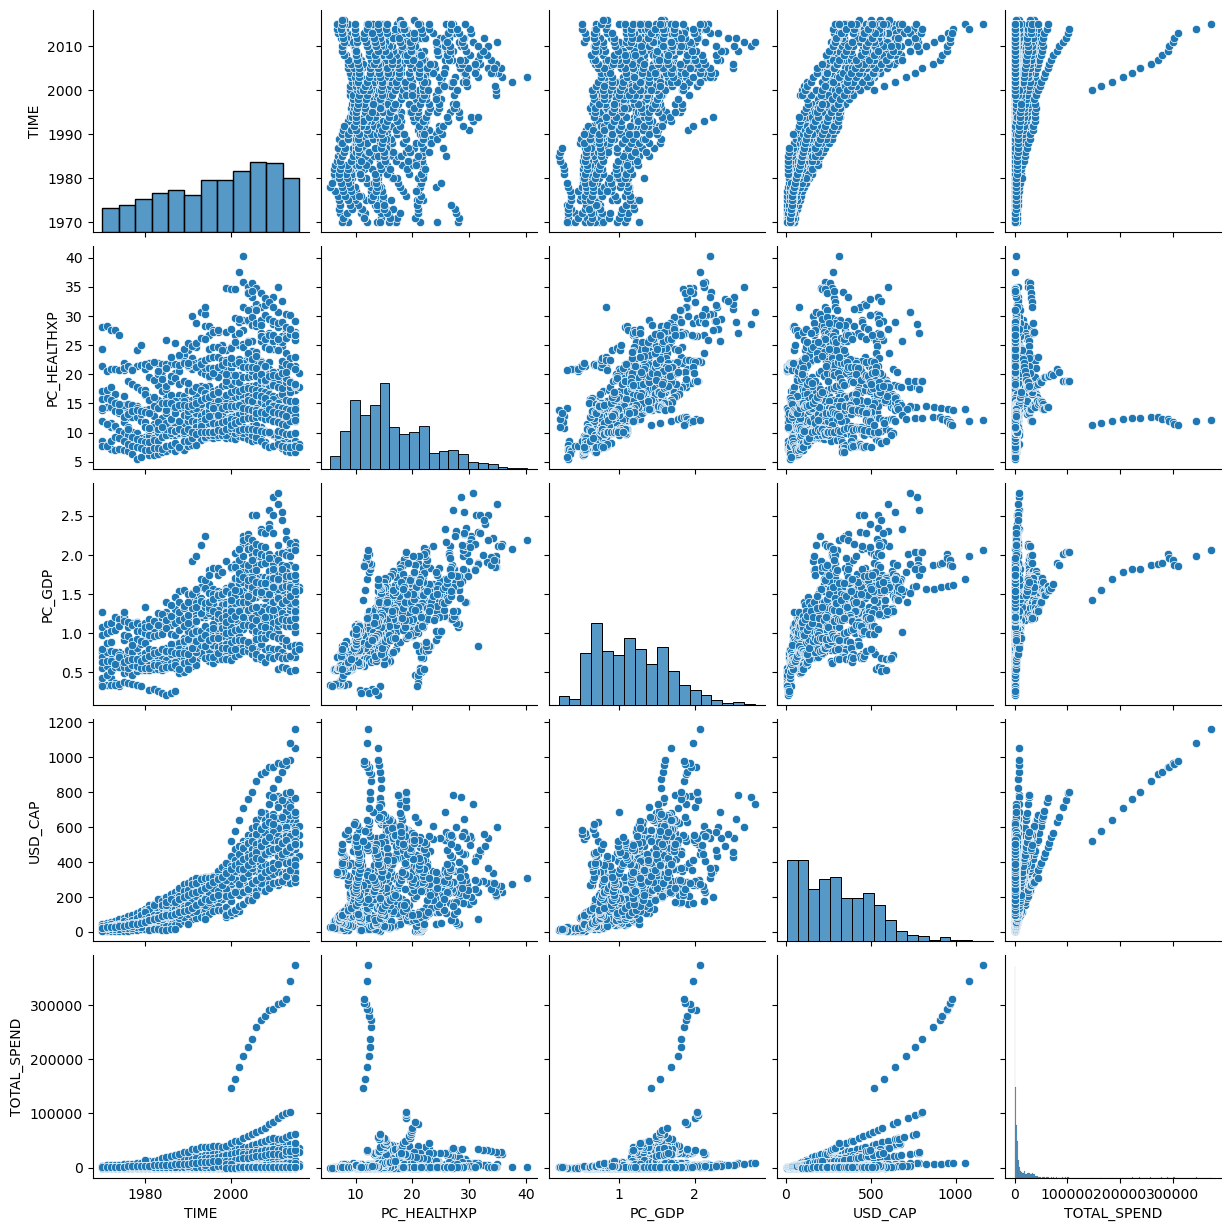

In [8]:
#Second variant of displaying correlations and distributions across all pairs of variables.
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.figure(figsize=(3,3))
sns.pairplot(df_file)
plt.show()
# Some correlations in this set of graphs

In [9]:
#Show TOTAL_SPEND trends over time for each location
import plotly.express as px
fig = px.line(df_file, x='TIME', y='TOTAL_SPEND', color='LOCATION')
fig.show()
# increase in money spent over the years in every country. Portugal and Greece started declining after 2010.

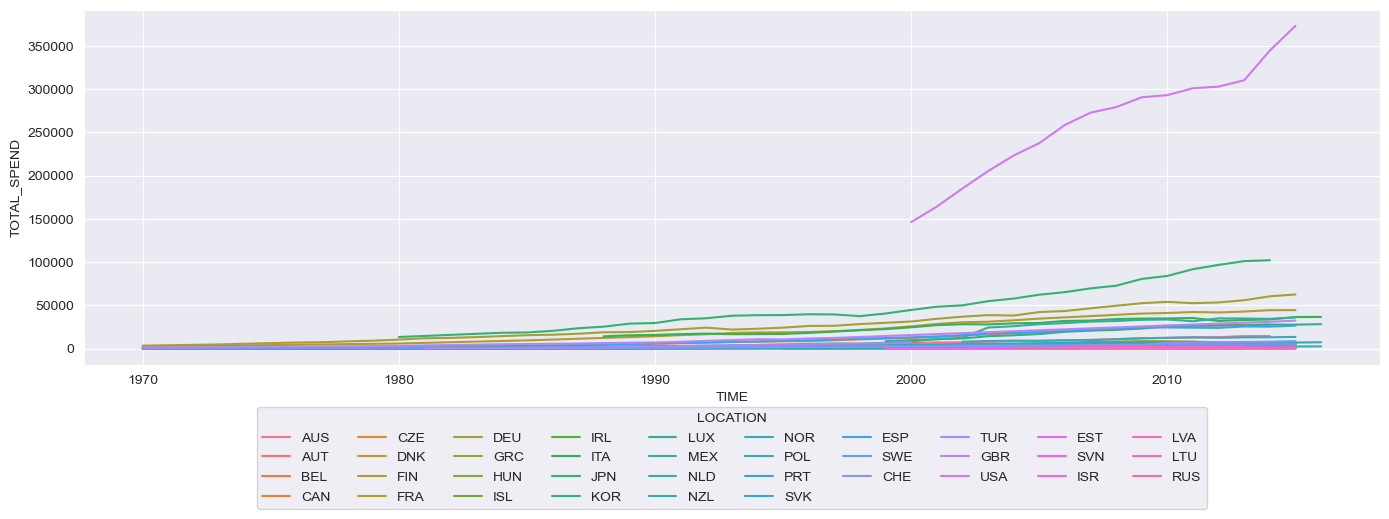

In [10]:
#Create a line plot showing TOTAL_SPEND over time across different locations, with a customized legend layout to improve readability
plt.figure(figsize=(14,6))
sns.set_style('darkgrid')
lineplot = sns.lineplot(data=df_file, x='TIME', y='TOTAL_SPEND', hue='LOCATION')
num_items_per_row = 10
num_legend_rows = -(-len(df_file['LOCATION'].unique()) // num_items_per_row)
plt.legend(title='LOCATION', bbox_to_anchor=(0.5, -0.1), loc='upper center', ncol=num_items_per_row)
plt.tight_layout(rect=[0, 0.1, 1, 1])
plt.show()

In [11]:
#Show the location, time, and other details associated with the highest spending record
print(df_file.loc[df_file['TOTAL_SPEND'].idxmax()])

LOCATION             USA
TIME                2015
PC_HEALTHXP       12.227
PC_GDP             2.068
USD_CAP         1162.399
FLAG_CODES           NaN
TOTAL_SPEND    373009.91
Name: 971, dtype: object


In [12]:
#Correlation between time and health expenditure (represented by PC_HEALTHXP) across different locations
fig = px.line(df_file, x='TIME', y='PC_HEALTHXP', color='LOCATION')
fig.update_layout(
    title='Correlation between Time and PC Health Expenditure by Location',
    xaxis_title='Time',
    yaxis_title='PC Health Expenditure',
    legend_title='Location'
)
fig.show()

<Figure size 1200x800 with 0 Axes>

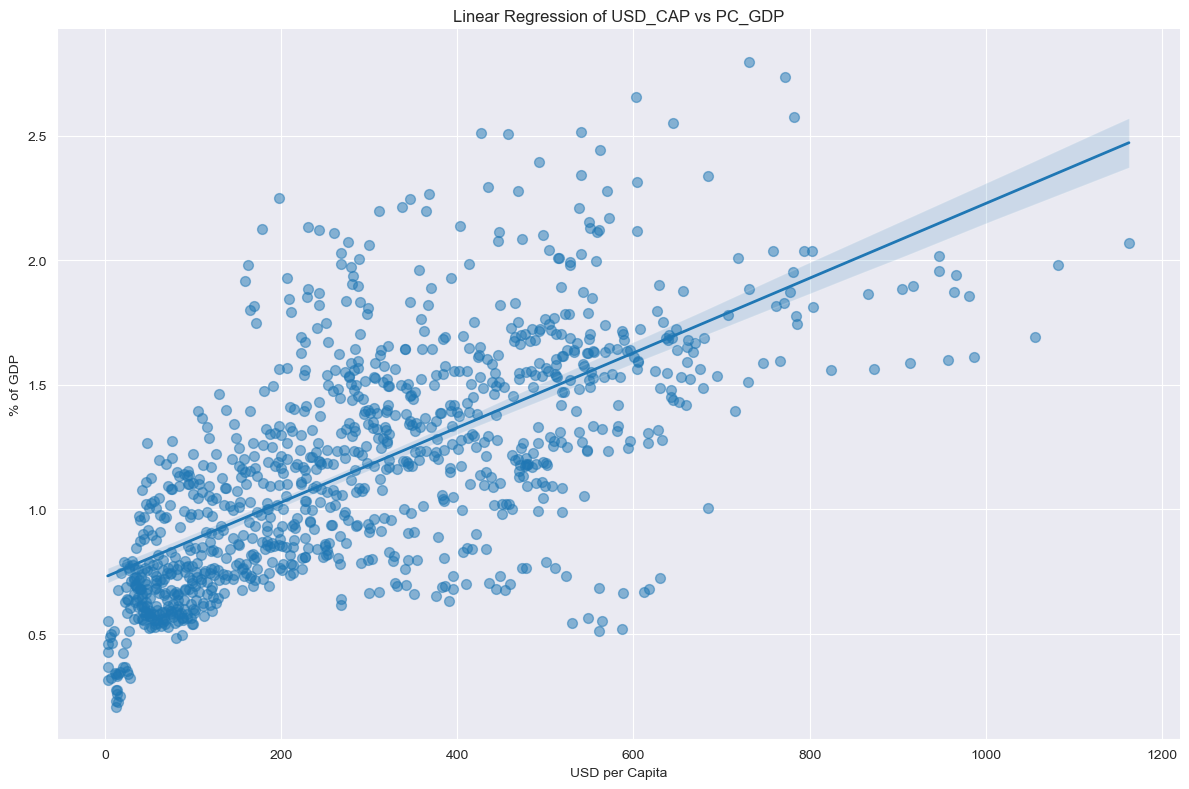

In [13]:
#Generate a scatter plot with a linear regression line to examine the relationship between USD_CAP and PC_GDP using Seaborn
plt.figure(figsize=(12,8))
sns.lmplot(data=df_file, x='USD_CAP', y='PC_GDP', 
           height=8, aspect=1.5, 
           scatter_kws={'s': 50, 'alpha': 0.5},
           line_kws={'lw': 2})  
plt.xlabel('USD per Capita')
plt.ylabel('% of GDP')
plt.title('Linear Regression of USD_CAP vs PC_GDP')
plt.tight_layout()
plt.show()